In [16]:
# import libraries
import pandas as pd
import numpy as np

In [17]:
# load dataset
dataset = pd.read_csv("AB_NYC_2019.csv")

## Data Preparation

In [8]:
df = pd.DataFrame(dataset)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
# make all column headings uniform with lower case and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [12]:
# list all columns whose values are objects
strings = list(df.dtypes[df.dtypes == "object"].index)
strings

['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'last_review']

In [18]:
# make all object values lower case and replaces spaces with underscores
for col in strings:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [19]:
# nicely prepared Data Frame
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,clean_&_quiet_apt_home_by_the_park,2787,john,brooklyn,kensington,40.64749,-73.97237,private_room,149,1,9,2018-10-19,0.21,6,365
1,2595,skylit_midtown_castle,2845,jennifer,manhattan,midtown,40.75362,-73.98377,entire_home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,the_village_of_harlem....new_york_!,4632,elisabeth,manhattan,harlem,40.80902,-73.94190,private_room,150,3,0,NaN,NaN,1,365
3,3831,cozy_entire_floor_of_brownstone,4869,lisaroxanne,brooklyn,clinton_hill,40.68514,-73.95976,entire_home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,entire_apt:_spacious_studio/loft_by_central_park,7192,laura,manhattan,east_harlem,40.79851,-73.94399,entire_home/apt,80,10,9,2018-11-19,0.10,1,0


## Exploratory Data Analysis

In [23]:
# check for some information about columns such as unique values, number of unique values per column e.t.c.
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

id
[2539 2595 3647 3831 5022]
48895

name
['clean_&_quiet_apt_home_by_the_park' 'skylit_midtown_castle'
 'the_village_of_harlem....new_york_!' 'cozy_entire_floor_of_brownstone'
 'entire_apt:_spacious_studio/loft_by_central_park']
47486

host_id
[2787 2845 4632 4869 7192]
37457

host_name
['john' 'jennifer' 'elisabeth' 'lisaroxanne' 'laura']
11428

neighbourhood_group
['brooklyn' 'manhattan' 'queens' 'staten_island' 'bronx']
5

neighbourhood
['kensington' 'midtown' 'harlem' 'clinton_hill' 'east_harlem']
221

latitude
[40.64749 40.75362 40.80902 40.68514 40.79851]
19048

longitude
[-73.97237 -73.98377 -73.9419  -73.95976 -73.94399]
14718

room_type
['private_room' 'entire_home/apt' 'shared_room']
3

price
[149 225 150  89  80]
674

minimum_nights
[ 1  3 10 45  2]
109

number_of_reviews
[  9  45   0 270  74]
394

last_review
['2018-10-19' '2019-05-21' nan '2019-07-05' '2018-11-19']
1764

reviews_per_month
[0.21 0.38  nan 4.64 0.1 ]
937

calculated_host_listings_count
[6 2 1 4 3]
47

avail

Visualize the Distribution of Price

In [24]:
# import Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='price', ylabel='Count'>

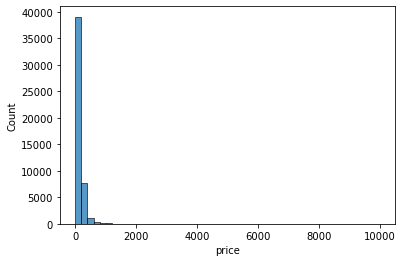

In [25]:
sns.histplot(df.price, bins=50)

Price distribution is a long tail

<AxesSubplot:xlabel='price', ylabel='Count'>

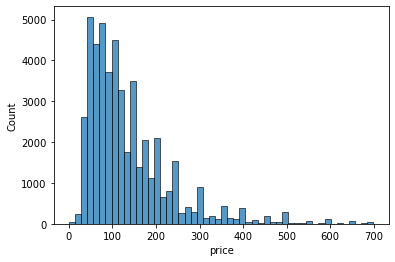

In [35]:
# histogram of prices less than 700
sns.histplot(df.price[df.price < 700], bins=50)

<AxesSubplot:xlabel='price', ylabel='Count'>

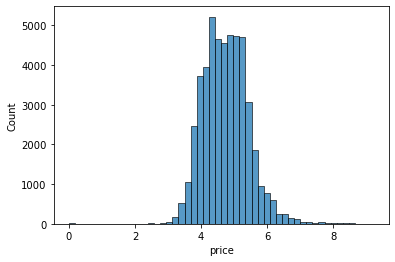

In [36]:
# applying logarithmic transformation on the price set to handle long tail distribution
price_logs = np.log1p(df.price)
sns.histplot(price_logs, bins=50)